In [1]:
import numpy as np
from copy import deepcopy
from tqdm import tqdm
from utils.freq import freq
from utils.bpe import *

In [2]:
# make uniform data of varying alphabet sizes

def make_data(alph_size: int, n: int, m:int):
    # 10**n elements created
    # m number of repeats of the experiment
    for alphabet_size in [alph_size]:
        for dataset_num in range(m):
            data = np.random.randint(
                low=0,
                high=alphabet_size,
                size=(10**n)
            )
            path = f'data/alph_{alphabet_size}_{n}_{dataset_num}.npy'
            np.save(path, data)

alph_size = 8
n = 6
make_data(alph_size=alph_size, n=n, m=1)

In [3]:
# byte pair tokenize one at a time

# get settings for analysis
alphabet_size = 25
n = 5
dataset_num = 0
# read in data
path = f'data/alph_{alphabet_size}_{n}_{dataset_num}.npy'
arr = np.load(path)

# analysis
k = 5000 # number of steps of bpe
merges = {}
freq_dict = freq(arr=arr)
freq_dicts = [deepcopy(freq_dict)]

prog_bar = tqdm(range(k), total=k)
for k_i in prog_bar:
    arr, merges, alphabet_size = one_step_of_bpe(
        ids=arr, 
        merges=merges, 
        alphabet_size=alphabet_size
    )
    freq_dict = freq(arr=arr)
    freq_dicts.append(freq_dict)
    prog_bar.set_description(f'Completed {k_i}-th BPE step.')


Completed 4999-th BPE step.: 100%|██████████| 5000/5000 [04:53<00:00, 17.02it/s]


In [4]:
# make zipf and error data

# zipf's law
xs_data = []
loglog_data = []
zipfs_data = []
error_data = []
for freq_dict in freq_dicts:
    # format data
    xs = [key_num+1 for key_num, key in enumerate(freq_dict)]
    xs_data.append(xs)
    data = [float(value) for key, value in freq_dict.items()]
    loglog_data.append(data)
    # zipf data
    most_common_element = max(freq_dict.values())
    zipf = [most_common_element/x for x in xs]
    zipfs_data.append(zipf)
    # error data
    error = ((np.array(data) - np.array(zipf))**2).mean()
    error_data.append(error)



Saved animation at: ./visualizations/alph_100.gif


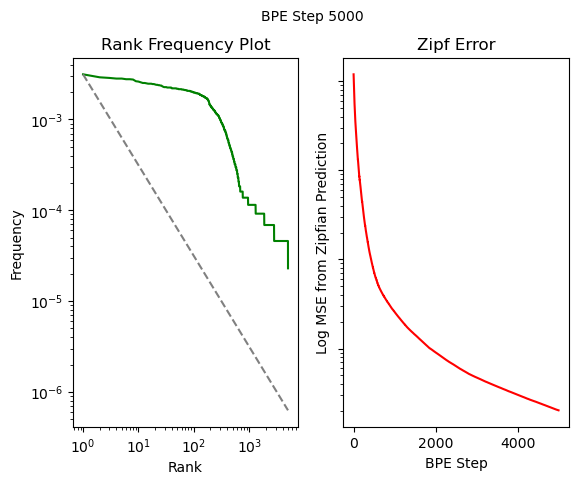

In [5]:
# animate
from utils.anim import anim

alphabet_size = 100
anim(
    xs_data=xs_data,
    loglog_data=loglog_data,
    zipfs_data=zipfs_data,
    error_data=error_data,
    save_path=f'./visualizations/alph_{alphabet_size}.gif',
)
